<IPython.core.display.Javascript object>


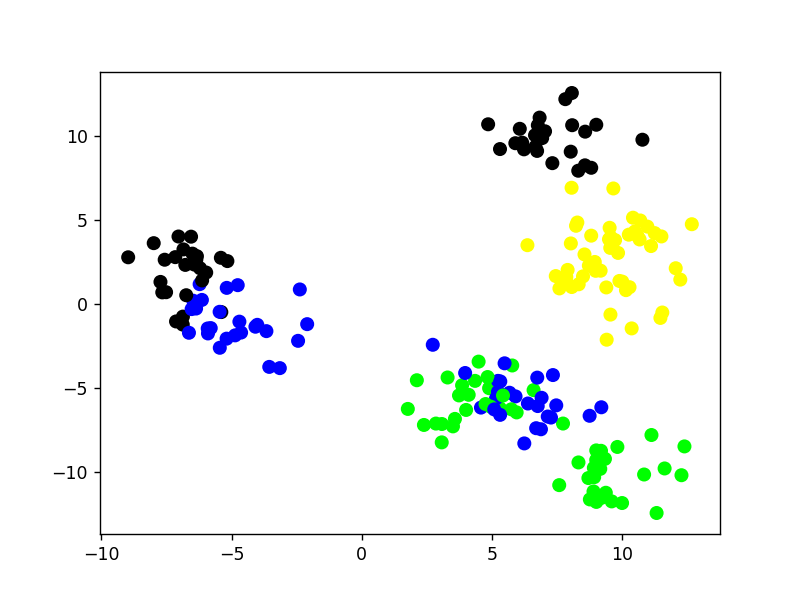

KNN  KNeighborsClassifier(weights='distance')
Accuracy of KNN classifier on training set: 1.00
Accuracy of KNN classifier on test set: 0.78
150
50
150
50
200
200


In [1]:
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np 
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_classification, make_blobs
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, classification_report
from sklearn import neighbors
cmap_bold = ListedColormap(['#FFFF00', '#00FF00', '#0000FF','#000000'])
X_D2, y_D2 = make_blobs(n_samples = 200, n_features = 2, centers = 8,
                        cluster_std = 1.3, random_state = 4)
plt.figure()
plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2, marker= 'o', s=50, cmap=cmap_bold)
plt.show()


X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2,
                                                    random_state = 0)
clf = neighbors.KNeighborsClassifier(n_neighbors=5, weights='distance') 
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print('KNN ', clf)
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of KNN classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))
print(len(X_D2))
print(len(y_D2))

In [2]:
cm = confusion_matrix(y_test, predictions)
print(cm)
report = classification_report(y_test, predictions)
print(report)


[[9 1 0 0 0 0 0 0]
 [0 7 0 0 0 0 0 0]
 [0 0 4 0 0 2 0 0]
 [0 0 0 3 0 0 0 0]
 [0 0 0 0 1 0 0 0]
 [0 0 7 0 0 2 0 0]
 [0 0 0 0 0 0 8 0]
 [0 0 0 0 1 0 0 5]]
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.88      1.00      0.93         7
           2       0.36      0.67      0.47         6
           3       1.00      1.00      1.00         3
           4       0.50      1.00      0.67         1
           5       0.50      0.22      0.31         9
           6       1.00      1.00      1.00         8
           7       1.00      0.83      0.91         6

    accuracy                           0.78        50
   macro avg       0.78      0.83      0.78        50
weighted avg       0.81      0.78      0.77        50



<IPython.core.display.Javascript object>


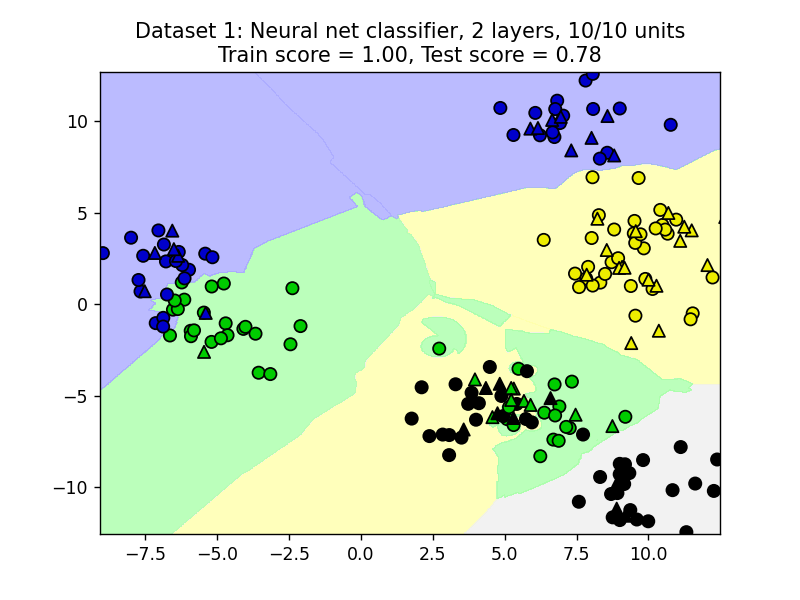

In [3]:
from adspy_shared_utilities import plot_class_regions_for_classifier
plot_class_regions_for_classifier(clf, X_train, y_train, X_test, y_test,
                                 'Dataset 1: Neural net classifier, 2 layers, 10/10 units')


[1.0, 0.9466666666666667, 0.9333333333333333, 0.92, 0.92, 0.9, 0.8933333333333333, 0.9133333333333333, 0.88, 0.8866666666666667]
[0.74, 0.8, 0.78, 0.78, 0.8, 0.78, 0.8, 0.8, 0.78, 0.76]


<IPython.core.display.Javascript object>


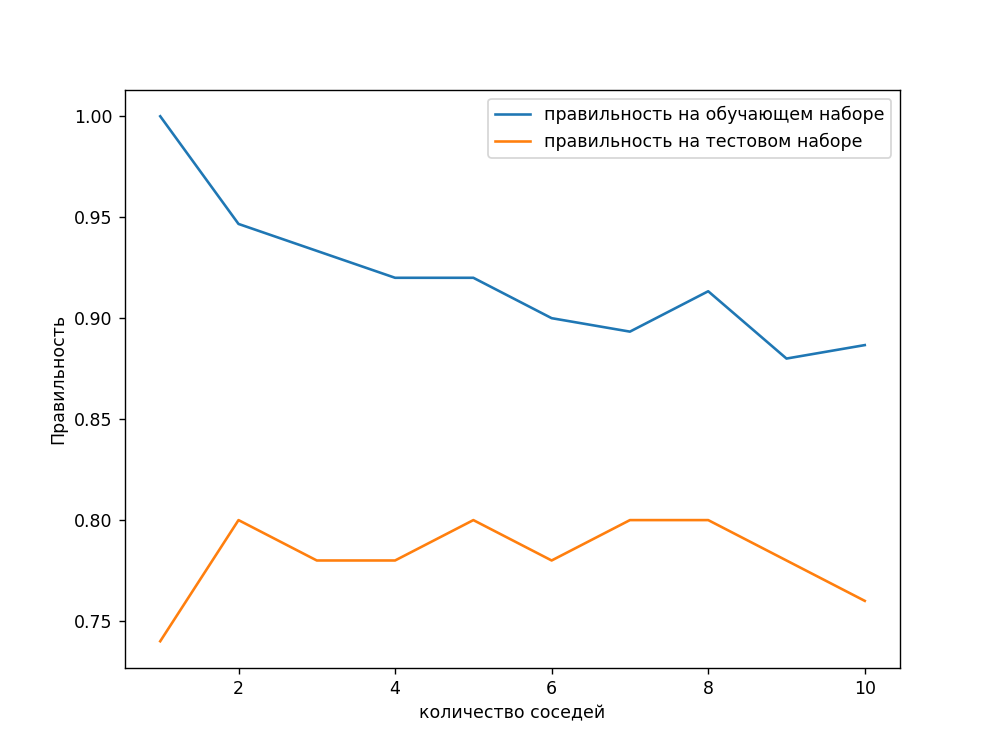

In [4]:
from sklearn.neighbors import KNeighborsClassifier
X_D2, y_D2 = make_blobs(n_samples = 200, n_features = 2, centers = 8,
                        cluster_std = 1.3, random_state = 4)
training_accuracy = []
test_accuracy = []
# пробуем n_neighbors от 1 до 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
 # строим модель
 clf = neighbors.KNeighborsClassifier(n_neighbors=n_neighbors)
 clf.fit(X_train, y_train)
 # записываем правильность на обучающем наборе
 training_accuracy.append(clf.score(X_train, y_train))
 # записываем правильность на тестовом наборе
 test_accuracy.append(clf.score(X_test, y_test))
print(training_accuracy)
print(test_accuracy)
plt.figure()
plt.plot(neighbors_settings, training_accuracy, label="правильность на обучающем наборе")
plt.plot(neighbors_settings, test_accuracy, label="правильность на тестовом наборе")
plt.ylabel("Правильность")
plt.xlabel("количество соседей")
plt.legend()

In [5]:
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
# загружаем и разбиваем данные
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
# вычисляем минимум и максимум по обучающим данным
scaler = MinMaxScaler().fit(X_train)

# масштабируем обучающие данные
X_train_scaled = scaler.transform(X_train)
svm = SVC()
# строим SVM на масштабированных обучающих данных
svm.fit(X_train_scaled, y_train)
# масштабируем тестовые данные и оцениваем качество на масштабированных данных
X_test_scaled = scaler.transform(X_test)
print("Правильность на тестовом наборе: {:.2f}".format(svm.score(X_test_scaled, y_test)))

Правильность на тестовом наборе: 0.97


In [6]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=5)
grid.fit(X_train_scaled, y_train)
print("Наил знач правильности перекр проверки: {:.2f}".format(grid.best_score_))
print("Наил знач правильности на тесте: {:.2f}".format(grid.score(X_test_scaled, y_test)))
print("Наил параметры: ", grid.best_params_)

Наил знач правильности перекр проверки: 0.98
Наил знач правильности на тесте: 0.97
Наил параметры:  {'C': 1, 'gamma': 1}
